In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
data = datasets.load_digits()

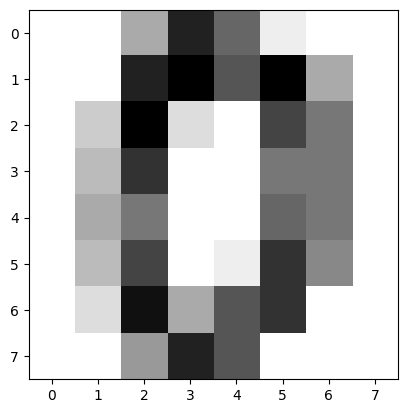

In [3]:
plt.subplot()
plt.imshow(data.images[0], cmap=plt.cm.gray_r)

In [4]:
X = data.images.reshape((len(data.images), -1))

In [5]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
y = data.target

In [7]:
import sklearn
sklearn.__version__

'1.5.1'

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
rfc_clf = RandomForestClassifier(n_estimators=1000)
rfc_clf.fit(X[:1000], y[:1000])

RandomForestClassifier(n_estimators=1000)

In [10]:
from sklearn import metrics

In [11]:
p = rfc_clf.predict(X[1000:])
e = y[1000:]
print(metrics.classification_report(e, p))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        79
           1       0.96      0.89      0.92        80
           2       1.00      0.90      0.95        77
           3       0.89      0.82      0.86        79
           4       0.98      0.95      0.96        83
           5       0.90      0.98      0.94        82
           6       0.98      1.00      0.99        80
           7       0.93      0.99      0.96        80
           8       0.88      0.91      0.90        76
           9       0.86      0.93      0.89        81

    accuracy                           0.93       797
   macro avg       0.94      0.93      0.93       797
weighted avg       0.94      0.93      0.93       797



In [12]:
print(metrics.confusion_matrix(e, p))

[[78  0  0  0  1  0  0  0  0  0]
 [ 0 71  0  2  0  1  0  0  0  6]
 [ 1  0 69  4  0  0  0  0  0  3]
 [ 0  1  0 65  0  3  0  3  7  0]
 [ 0  0  0  0 79  0  0  2  0  2]
 [ 0  0  0  0  0 80  2  0  0  0]
 [ 0  0  0  0  0  0 80  0  0  0]
 [ 0  0  0  0  0  0  0 79  1  0]
 [ 0  2  0  0  1  2  0  1 69  1]
 [ 0  0  0  2  0  3  0  0  1 75]]


In [13]:
len(e)

797

In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [19]:
ada_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, algorithm='SAMME')
ada_clf.fit(X[:1000], y[:1000])

AdaBoostClassifier(algorithm='SAMME', estimator=DecisionTreeClassifier(),
                   n_estimators=100)

In [20]:
p = ada_clf.predict(X[1000:])
e = y[1000:]
print(metrics.classification_report(e, p))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96        79
           1       0.67      0.51      0.58        80
           2       0.85      0.73      0.78        77
           3       0.76      0.78      0.77        79
           4       0.85      0.88      0.86        83
           5       0.70      0.84      0.76        82
           6       0.87      0.86      0.87        80
           7       0.82      0.81      0.82        80
           8       0.64      0.64      0.64        76
           9       0.72      0.78      0.75        81

    accuracy                           0.78       797
   macro avg       0.78      0.78      0.78       797
weighted avg       0.78      0.78      0.78       797

